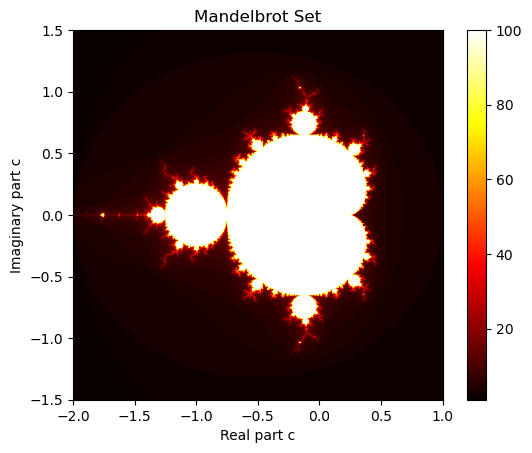

In [41]:
## More simple example: https://www.youtube.com/watch?v=xjjmkg9J7Gg
import matplotlib.pyplot as plt
import numpy as np

def mandelbrot(c, max_iter):
    z = 0
    # iterate the function z^2 + c where c is a complex number
    for n in range(max_iter):
        if abs(z) > 2: # we bound at + or -2 to say if it exceeds that, then it escapes to infinity
            return n
        # equation to iterate:
        z = (z ** 2) + c
    return max_iter # if no z result escapes, then return the max iteration number to signal non-divergence

def mandelbrot_set(*, xmin, xmax, ymin, ymax, width, height, max_iter): 
    # generate a set of values to use on the complex plane (for the z value)
    x = np.linspace(xmin,xmax,width) # real parts ; we use x and y vals to generate the c complex parameter for each iter in the formula
    y = np.linspace(ymin,ymax,height) # imaginary parts
    mset = np.zeros((height, width))

    for i in range(height):
        for j in range(width):
            c = complex(x[j],y[i]) # compute the c complex parameter using generated vals above
            # collect the number returned to indicate whether it escaped (less than max iters) or not (returns max iters)
            mset[i,j] = mandelbrot(c, max_iter)
    
    return mset


xmin,xmax,ymin,ymax = -2.0,1.0,-1.5,1.5

mandelbrot_image = mandelbrot_set(
    xmin=xmin,
    xmax=xmax,
    ymin=ymin,
    ymax=ymax,
    width=1000,
    height=1000,
    max_iter=100 # times to iterate the mandelbrot function z^2 + c
)

# print(mandelbrot_image)

plt.imshow(mandelbrot_image, extent=[xmin,xmax,ymin,ymax], cmap='hot' ) # can use others like spectral
plt.colorbar() # show color ranges for larger iteration values (took longer to diverge to infinity)
plt.title('Mandelbrot Set')
plt.xlabel('Real part c')
plt.ylabel('Imaginary part c')
plt.show()

In [4]:

# numba uses just in time compilation for more efficient processing
from numba import jit
from functools import partial
from numbers import Complex
from typing import Callable
import matplotlib.pyplot as plt
import numpy as np

# using Pillow: https://www.geeksforgeeks.org/julia-fractal-python/

## From https://codereview.stackexchange.com/questions/210271/generating-julia-set


# *, means every following arg must be specified as a keyword argument when called
def julia_set(*,
              fn: Callable[[Complex], Complex],
              min_coordinate: Complex,
              max_coordinate: Complex,
              width: int,
              height: int,
              iterations_count: int = 256,
              threshold: float = 2.) -> np.ndarray:
    """
    :param mapping: function defining Julia set
    :param min_coordinate: bottom-left complex plane coordinate
    :param max_coordinate: upper-right complex plane coordinate
    :param height: pixels in vertical axis
    :param width: pixels in horizontal axis
    :param iterations_count: number of iterations
    :param threshold: if the magnitude of z becomes greater
    than the threshold we assume that it will diverge to infinity
    :return: 2D pixels array of intensities
    """
    # np.ogrid generates an "open grid" of values. This means it doesn't create the full array in memory but provides a way to access the values as if it did
    # if you need to evaluate a function on a grid of points and you're only using a small portion of that grid, np.ogrid can help you avoid unnecessary memory usage.
    imaginary_axis, real_axis = np.ogrid[
                        min_coordinate.imag: max_coordinate.imag: height * 1j,
                        min_coordinate.real: max_coordinate.real: width * 1j] # using 1j instead of 1 offers some kind of easier way to specify steps with np.ogrid - you don't need to calculate the step size this way
    
    z = real_axis + 1j * imaginary_axis # array of z values for each pixel in the image
    live, = np.indices(z.shape)[0] # indexes of pixels that have not escaped, not diverged to infinity
    iterations = np.empty_like(z, dtype=int)

    for i in range(iterations_count):
        z_live = z[live] = fn(z[live])
        escaped = np.abs(z_live) > threshold
        iterations[live[escaped]] = i
        live = live[~escaped]
    iterations[live] = iterations_count # indicates pixels that don't escape - they are given the value of iterations count
    return (iterations_count - iterations).reshape((height, width)) # get the non eliminated points. The subtraction could be omitted if you reverse the colour map.

# set parameters
def fn(z: Complex,*,c: Complex):
    return z ** 2 + c
func_to_iterate = partial(fn,
                    c=-0.7 + 0.27015j)  # type: Callable[[Complex], Complex]

## Run the iterations
image = julia_set(fn=func_to_iterate,
                    min_coordinate=-1.5 - 1j,
                    max_coordinate=1.5 + 1j,
                    width=800,
                    height=600)

## Show the plot
plt.axis('off')
plt.imshow(image,
            cmap='nipy_spectral',
            origin='lower')
plt.show()

ValueError: too many values to unpack (expected 1)

In [34]:
min_coordinate=-1.5 - 1j

max_coordinate=1.5 + 1j
width=2#800
height=4#600

imaginary_axis, real_axis = np.ogrid[
                        min_coordinate.imag : max_coordinate.imag : height * 1j,
                        min_coordinate.real : max_coordinate.real : width * 1j] 
print(imaginary_axis,real_axis)

z = real_axis + 1j * imaginary_axis # array of z values for each pixel in the image
print(z)
print(z.shape)
live = np.indices(z.shape)
print(live)
# live, = np.indices(z.shape)[0] # indexes of pixels that have not escaped, not diverged to infinity

[[-1.        ]
 [-0.33333333]
 [ 0.33333333]
 [ 1.        ]] [[-1.5  1.5]]
[[-1.5-1.j          1.5-1.j        ]
 [-1.5-0.33333333j  1.5-0.33333333j]
 [-1.5+0.33333333j  1.5+0.33333333j]
 [-1.5+1.j          1.5+1.j        ]]
(4, 2)
[[[0 0]
  [1 1]
  [2 2]
  [3 3]]

 [[0 1]
  [0 1]
  [0 1]
  [0 1]]]


In [ ]:
# Python code for Julia Fractal
from PIL import Image
  
# setting the width, height and zoom 
# of the image to be created
w, h, zoom = 1920,1080,1

# creating the new image in RGB mode
bitmap = Image.new("RGB", (w, h), "white")

# Allocating the storage for the image and
# loading the pixel data.
pix = bitmap.load()

# setting up the variables according to 
# the equation to  create the fractal
cX, cY = -0.7, 0.27015
moveX, moveY = 0.0, 0.0
maxIter = 255

for x in range(w):
    for y in range(h):
        zx = 1.5*(x - w/2)/(0.5*zoom*w) + moveX
        zy = 1.0*(y - h/2)/(0.5*zoom*h) + moveY
        i = maxIter
        while zx*zx + zy*zy < 4 and i > 1:
            tmp = zx*zx - zy*zy + cX
            zy,zx = 2.0*zx*zy + cY, tmp
            i -= 1

        # convert byte to RGB (3 bytes), kinda 
        # magic to get nice colors
        pix[x,y] = (i << 21) + (i << 10) + i*8

# to display the created fractal
bitmap.show()